c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

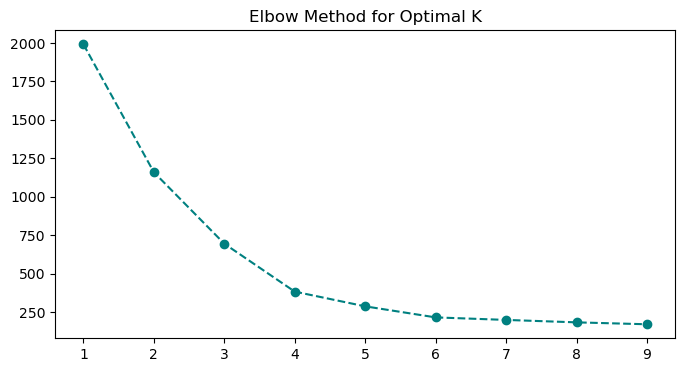

c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


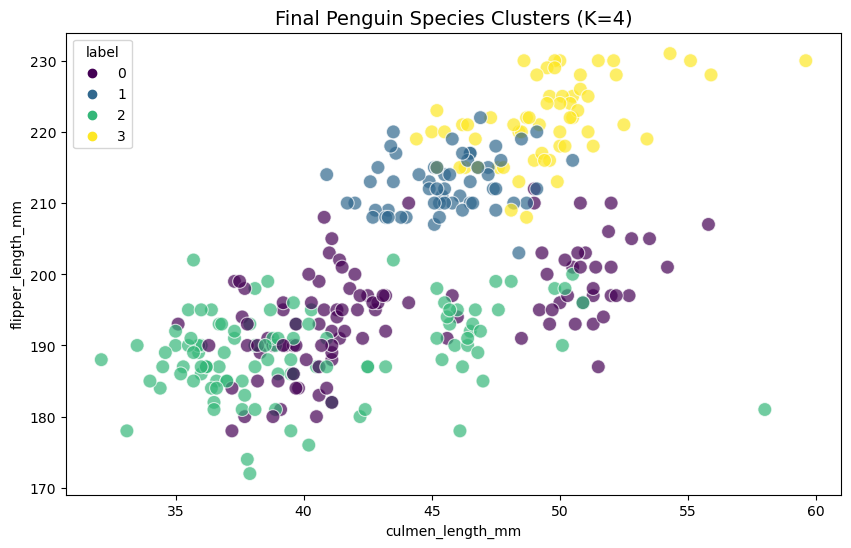

✅ Proceso completado. Gráficas guardadas en la carpeta 'images/'.


In [4]:
# ==========================================================
# PROJECT 06: PENGUIN CLUSTERING - PRODUCTION READY
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Crear carpeta 'images' si no existe
if not os.path.exists('images'):
    os.makedirs('images')
    print("📁 Carpeta 'images' creada con éxito.")

# 2. Carga y Limpieza
penguins_df = pd.read_csv("data/penguins.csv").dropna()

# 3. Preprocesamiento
penguins_clean = pd.get_dummies(penguins_df, dtype='int')
scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(penguins_clean)

# 4. Método del Codo y Guardado
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--', color='teal')
plt.title('Elbow Method for Optimal K')
plt.savefig('images/penguin_elbow_method.png', dpi=300) # <--- Guardado en carpeta images
plt.show()

# 5. Modelo Final (K=4)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

# 6. Visualización Profesional y Guardado
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=penguins_df, 
    x='culmen_length_mm', 
    y='flipper_length_mm', 
    hue='label', 
    palette='viridis', 
    s=100, alpha=0.7, edgecolor='w'
)
plt.title('Final Penguin Species Clusters (K=4)', fontsize=14)
plt.savefig('images/penguin_clusters_final.png', dpi=300) # <--- Guardado en carpeta images
plt.show()

# 7. Exportar Resultados Estadísticos
stat_penguins = penguins_df.groupby('label').mean(numeric_only=True)
stat_penguins.to_csv('images/cluster_stats_summary.csv') # Guardamos también los datos
print("✅ Proceso completado. Gráficas guardadas en la carpeta 'images/'.")